In [199]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from skimage.viewer import ImageViewer
from numpy import linalg
from matplotlib import cm as cm

# I) Aplicación de la SVD a la compresión de imágenes

## Recibir el path de un archivo de imagen png (i) y convertirlo en una matriz numerica con coeficientes en (0,1) (ii)

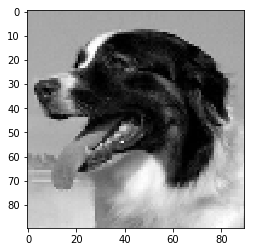

In [222]:
egImage = "https://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png"
img = io.imread(egImage, as_grey = True)
plt.imshow(img, cmap = cm.gray)
plt.show()

In [223]:
print (type(img))
print (str(img.shape))

<class 'numpy.ndarray'>
(90, 90)


## Le cortamos unos pedazos a la matriz y generamos una nueva

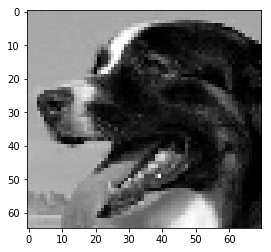

In [224]:
img2 = img[5:70,0:70]
plt.imshow(img2, cmap = cm.gray)
plt.show()

In [203]:
?imread

In [225]:
img.shape

(90, 90)

In [226]:
img2.shape

(65, 70)

## Realizar y verificar la descomposición SVD (iii)

In [227]:
?linalg.svd #Full SVD reconstruction means diagonlization? Reduced SVD reconstruction means SVD?

## Caso A simetrica 

In [230]:
u, s, vt = linalg.svd(img, full_matrices=True) #img es simetrica
print(u.shape)
S = np.diag(s)
print(S.shape)
print(vt.shape)


(90, 90)
(90, 90)
(90, 90)


## Comprobamos que el rango de la aproximación es el mismo

In [231]:
S=np.diag(s)
img_rec = np.matmul(np.matmul(u,S),vt)
print(img_rec.shape)

(90, 90)


## Caso A NO simetrica

In [320]:
u, s, vt = linalg.svd(img2, full_matrices=False) #img2 NO es simetrica
print(u.shape)
S = np.diag(s)
print(S.shape)
print(vt.shape)

(65, 65)
(65, 65)
(65, 70)


## Comprobamos que el rango de la aproximacion es el mismo

In [321]:
img2_rec = np.matmul(np.matmul(u,S),vt)
print(img2_rec.shape)

(65, 70)


Y, graficamos la aproximación SVD...

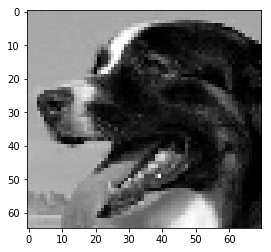

In [322]:
plt.imshow(img2_rec, cmap = cm.gray)
plt.show()

## Aproximaciones de la SVD con distintos valores de k (iv)...

In [323]:
k=1000


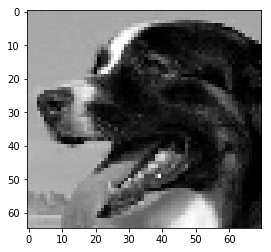

In [324]:
u_k = u[:,:k]
S_k = S[:k,:k]
vt_k = vt[:k,:]
img_k = np.matmul(u_k,np.matmul(S_k,vt_k))
plt.imshow(img_k, cmap = cm.gray)
plt.show()

La SVD sirve para almacenar de forma mas compacta imagenes ya que la matriz de aproximación de grado k contiene la información necesaria para replicar la imagen original

# II) Aplicaciones de la pseudoinversa en resolucion de sistemas de ecuaciones

## Programar una funcion que dada cualquier matriz devuelva la pseudoinversa usando la descomposición SVD (i). Hacer otra funcion que resuleva sistemas de ecuaciones de la forma $\mathbf b=A\overrightarrow{x} $ usando la pseudoinversa (ii)

In [325]:
#Primero hagamosla para una matriz particular y despues veamos el tema de la generalización. Sea A una matriz cualquiera:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
Au, As, Avt = linalg.svd(A, full_matrices=True)
As = np.diag(As)
A_inv = np.linalg.inv(A)
Au_inv = np.linalg.inv(Au)
As_inv = np.linalg.inv(As)
Avt_inv = np.linalg.inv(Avt)
print('                 A_inv')
print(A_inv)
print('                 Au_inv') 
print(Au_inv)
print('                 As_inv')
print(As_inv)
print('                 Avt_inv')
print(Avt_inv)

                 A_inv
[[  3.15251974e+15  -6.30503948e+15   3.15251974e+15]
 [ -6.30503948e+15   1.26100790e+16  -6.30503948e+15]
 [  3.15251974e+15  -6.30503948e+15   3.15251974e+15]]
                 Au_inv
[[-0.21483724 -0.52058739 -0.82633754]
 [ 0.88723069  0.24964395 -0.38794278]
 [ 0.40824829 -0.81649658  0.40824829]]
                 As_inv
[[  5.93538619e-02   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   9.36005742e-01   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   2.99872297e+15]]
                 Avt_inv
[[-0.47967118 -0.77669099 -0.40824829]
 [-0.57236779 -0.07568647  0.81649658]
 [-0.66506441  0.62531805 -0.40824829]]


In [326]:
#Verificacion del calculo de las inversas
print('         Au y Au inversa')
print(np.dot(Au,Au_inv))
print('         As y As inversa')
print(np.dot(As,As_inv))
print('         Avt y Avt inversa')
print(np.dot(Avt,Avt_inv))

         Au y Au inversa
[[  1.00000000e+00   1.41947968e-17   5.57963563e-17]
 [ -9.68275056e-17   1.00000000e+00  -3.92582663e-17]
 [  2.85205104e-19   1.62528850e-17   1.00000000e+00]]
         As y As inversa
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
         Avt y Avt inversa
[[  1.00000000e+00   4.83224633e-17  -4.78154775e-17]
 [ -7.18868794e-18   1.00000000e+00  -2.69802028e-17]
 [  7.69567375e-18   8.40420997e-17   1.00000000e+00]]


La definición de la psuedo inversa es la siguiente. Partiendo de la SVD $ \mathbf A = U \Sigma V^{T} $ por lo que la pseudoinversa de A será $ A^{+}=V \Sigma^{-1} U^{T} $

In [327]:
#NO ME DA PREGUNTAR MAÑANA
A_pseudo_inv = np.dot(Avt_inv,np.dot(As_inv,Au_inv))
print("           Metodo propio")
print (A_pseudo_inv)
print("           Metodo numpy ")
print(A_inv)


           Metodo propio
[[ -4.99787161e+14   9.99574322e+14  -4.99787161e+14]
 [  9.99574322e+14  -1.99914864e+15   9.99574322e+14]
 [ -4.99787161e+14   9.99574322e+14  -4.99787161e+14]]
           Metodo numpy 
[[  3.15251974e+15  -6.30503948e+15   3.15251974e+15]
 [ -6.30503948e+15   1.26100790e+16  -6.30503948e+15]
 [  3.15251974e+15  -6.30503948e+15   3.15251974e+15]]


La función:

In [331]:
def get_pseudoinverse(matriz):
    "Regresa la pseudo inversa de la matriz dada"
    Au, As, Avt = linalg.svd(matriz, full_matrices=True)
    As = np.diag(As)
    Au_inv = Au.transpose()
    As_inv = np.linalg.inv(As)
    Avt_inv = Avt.transpose()
    
    pseudo_matriz = np.dot(Avt_inv,np.dot(As_inv, Au_inv))
    
    return pseudo_matriz

Verifiquemos que sirve...

In [332]:
#Verifiquemos que sirve
A = np.array([[1,2,4],[1,4,6],[2,1,6]])
Ainv = get_pseudoinverse(A)
iden = np.dot(A,Ainv)
print("La matriz A por su pseudoinversa debe ser la identidad")
iden

La matriz A por su pseudoinversa debe ser la identidad


array([[  1.00000000e+00,  -6.21724894e-15,  -2.66453526e-15],
       [  6.21724894e-15,   1.00000000e+00,  -1.33226763e-15],
       [  1.33226763e-14,  -5.32907052e-15,   1.00000000e+00]])

Función para solucionar sistemas de ecuaciones lineales de la forma: $\mathbf b=A\overrightarrow{x} $ usando la pseudoinversa de A talque $ \mathbf A^{+}b=\overrightarrow{x}$

In [333]:
def resuelve_ec(A,b):
    #Primero obtengamos la pseudoinversa con el metodo get_pseudoinverse recien creado
    A_inv = get_pseudoinverse(A)
    x = np.dot(A_inv, b)
    return x

Verifiquemos que sirve...

In [334]:
A = np.array([[1,2],[2,1]])
b = np.array([3,3])
print('\n  matriz A =\n',A,'\n  b=',b)
x = resuelve_ec(A,b)
print('\n  x = ',x)
y = np.dot(A,x)
print('\n  Ax = ',y)


  matriz A =
 [[1 2]
 [2 1]] 
  b= [3 3]

  x =  [ 1.  1.]

  Ax =  [ 3.  3.]


Jugar con el sistema $ \mathbf Ax=b $ donde $ \mathbf A = [[1,1],[0,0]] $ y $ \mathbf b $ puede tomar distintos valores. ¿Cúal es la imagen de A?¿Qué pasa con la solución a la ecuación si $ \mathbf b $ no esta en la imagen de A, la solución resultante es única?

* $ \mathbf Ax=b \rightarrow Img(A) = \left \{ {y \in \mathbb{R}^{2} : \exists x : Ax=y} \right \}  $ <p>Por lo que la solución al sistema consiste en encontrar los valores de $\mathbf  x_{1}, x_{2} $ para los cuales se cumple que:</p>
$$ \begin{pmatrix}
 a, b \\ 
 c, d 
\end{pmatrix} \begin{pmatrix}
 x_{1} \\ 
 x_{2} 
\end{pmatrix} =  \begin{pmatrix}
 b_{1} \\ 
 b_{2} 
\end{pmatrix} $$
$$ \rightarrow 
ax_{1}+bx_{2} = b_{1} \cap  cx_{1}+dx_{2} = b_{2} $$
<p>Por lo que si $ \mathbf c=0,d=0,b_{2}=1 $ $ \mathbf b \notin Img(A) $ </p>
<p>Pues tendría suceder:</p> $$ \mathbf x_{1}+x_{2}=1 $$ <p> y </p> $$ 0=1 $$
 $$ \rightarrow \mathbf Img(A) =\left \{   {y \in \mathbb{R}^{2} : y_{1} \in \mathbb{R} \cap 1 = 0} \right \} $$ 
<p> Si $\mathbf b $ no se encuentra en la $\mathbf Img(A) $  es necesario encontrar una proyección de este vector en el espacio generado por las columnas de la matriz $\mathbf A$, generalmente se usa a la matriz de proyección:</p> $$\mathbf P_{x} = x \left[  xx^{T}  \right]^{-1} x^{T} $$
<p>Lo que implica que: </p> $$  \widehat{b} \mathbf = AP_{x} = A \left( x \left[  xx^{T}  \right]^{-1} x^{T} \right) $$
<p>Para resolver este sistema se utiliza el método de mínimos cuadrados y la solución del método es única</p>

Matriz A con determinante igual a 0:
<p>En este caso la solución es {$  \mathbf x \in \mathbb{R}^{2} : x_{1}+x_{2}=1 \cap $ ¡$ 1=0 $! $ $} </p>
<p>Que significa que el vector $ \mathbf b \notin Img(A) $

In [335]:
# Usemos nuestras funciones para jugar con distintos valores de b
A = np.array([[1,1],[0,0]])
b = np.array([1,1])
x = resuelve_ec(A,b)
print(x)

LinAlgError: Singular matrix

Matriz A con determinante distinto de 0:
<p>En este caso la solución es {$  \mathbf x \in \mathbb{R}^{2} : x_{1}+x_{2}=1 \cap  1=e^{-32}x_{2}  $} </p>
<p>Que significa que el vector $ \mathbf b \in Img(A) $

In [338]:
A = np.array([[1,1],[0,1e-32]])
b = np.array([1,1])
x = resuelve_ec(A,b)
print(x)


[ -1.00000000e+32   1.00000000e+32]


## Importar un archivo csv usando la libreria pandas y resolver un modelo de minimos cuadrados

In [263]:
import pandas as pd
from sklearn.linear_model import LinearRegression

base = pd.read_csv("study_vs_sat.csv", header=0)
print(base.head())
print(base.dtypes)

   study_hours  sat_score
0            4        390
1            9        580
2           10        650
3           14        730
4            4        410
study_hours    int64
sat_score      int64
dtype: object


<p>Se comienza por postular a la forma del valor esperado del sat_score $ \mathbf y $ condicional a las study_hours $ \mathbf x $ como una relación lineal (MPL) en el cual si se puede asumir que $ \mathbf E(\vec{u} \mid \vec{x})=0 $ , se tiene: </p>
$$ \vec{y} = \vec{ \beta } \vec{x} + \vec{u} \Rightarrow E( \vec{y} \mid \vec{x} ) = \vec{ \beta} \vec{x} $$
<p>Con: </p> $$ \vec{ \beta } = (1, \beta_{1}, ... , \beta_{n}) $$
<p>Por lo que, el problema que se desea resolver es el siguiente: </p>
$$ \mathbf min_{ \vec{ \beta }} E(UU_{T}) = min_{ \vec{ \beta }} E(( \vec{y} - E( \vec{y} \mid \vec{x}))^2) $$
<p>Con función objetivo: $ \mathbf E(( \vec{y}- \vec{ \beta } \vec{x})( \vec{y}- \vec{ \beta } \vec{x})^{T}) $ </p>
<p>El gradiente de este problema se encuentra al derivar con respecto a $ \vec{ \beta } $ la funcion objetivo: </p>
$$ \bigtriangledown_{ \vec{ \beta } } = \frac{\partial  E(( \vec{y}- \vec{ \beta } \vec{x})( \vec{y}- \vec{ \beta } \vec{x})^{T}) }{\partial \vec{ \beta }} $$
<p>La C.P.O de este problema obligan a que en el optimo se cumpla : </p>
$$ \bigtriangledown_{ \vec{ \beta } } = \vec{0} $$
<p>La libreria sklearn ya contiene el modulo de regresion lineal que permite encontrar los coeficientes buscados a travéz del método fit </p>

In [271]:
base_reg = np.matrix(base)
X, Y = base_reg[:,0], base_reg[:,1]
mdl = LinearRegression().fit(X, Y)
m = mdl.coef_[0]
b = mdl.intercept_
print("E(Y|X): E(y|x) = {0}E(x) + {1}".format(m,b))

E(Y|X): E(y|x) = [ 25.32646778]E(x) + [ 353.1648795]


Construye una función que reciba valores de alpha, beta y horas de estudio para devolver en vector de numpy con la predección del modelo de mínimos cuadrados correspondiente

In [273]:
def MejorPredictorLineal(alpha, beta, x):
    "Regresa el resultado de la ecuacion postulada: Mejor Predictor Lineal"
    X = np.array(x)
    y_arr = b + m*X 
    return y_arr


Veamos que sucede si hay obtenemos una muestra distinta de individuos y les aplicamos el Mejor Predictor Lineal que postulamos:

In [278]:
ListaDeNuevasCalificaciones = np.array([[6, 7, 8, 9, 7]])
ResultadosPredecidos = MejorPredictorLineal(353.16, 25.33, ListaDeNuevasCalificaciones)

print('\n Resultados Predecidos  E(Y|X) =', ResultadosPredecidos)



 Resultados Predecidos  E(Y|X) = [[ 505.12368617  530.45015394  555.77662172  581.1030895   530.45015394]]


In [314]:
import itertools
import operator
print(base_reg[:,0].size)
horas_est = np.array([base_reg[:5,0]])
print(horas_est)
item = print(horas_est.size)
aux = horas_est.tolist()
merged = list(itertools.chain(*aux))
print(merged)
b = np.array([[1, 1, 1, 1, 1],aux])
print(b)
b

20
[[[ 4]
  [ 9]
  [10]
  [14]
  [ 4]]]
5
[[4], [9], [10], [14], [4]]
[[1, 1, 1, 1, 1] [[[4], [9], [10], [14], [4]]]]


array([[1, 1, 1, 1, 1], [[[4], [9], [10], [14], [4]]]], dtype=object)

In [315]:
sum(aux,[])

[[4], [9], [10], [14], [4]]

In [316]:
base_reg_1 = np.matrix(base)+ b +1

In [319]:
alpha, beta = base_reg[:,0], base_reg[:,1]
